In [16]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Data

data = pd.read_csv("traffic.csv")

In [3]:
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
data["DateTime"] = pd.to_datetime(data["DateTime"])

In [5]:
data = data.drop(["ID"], axis=1) # dropping IDs

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [7]:
# df to be used for EDA

df = data.copy()

Text(0.5, 0, 'Date')

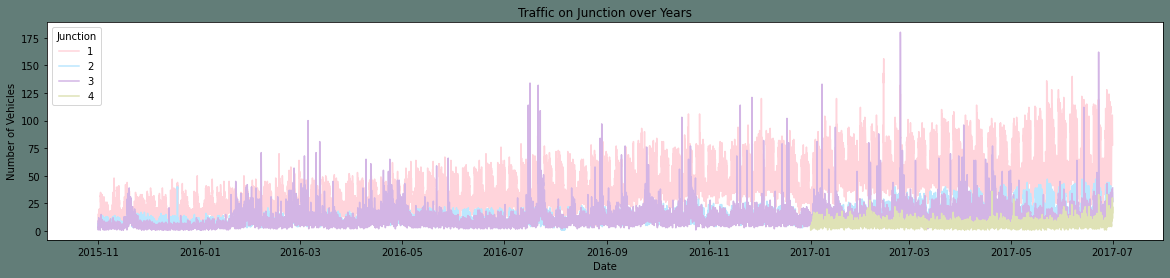

In [8]:
# Let's plot the Timeseries

colors = ["#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4), facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'], y='Vehicles', data=df, hue='Junction', palette=colors)
Time_series.set_title("Traffic on Junction over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

In [9]:
# Exploring more feature

df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


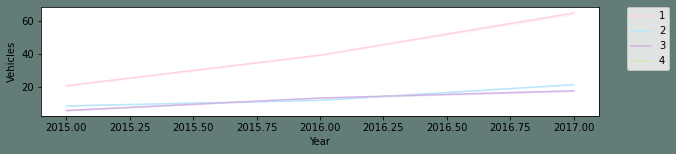

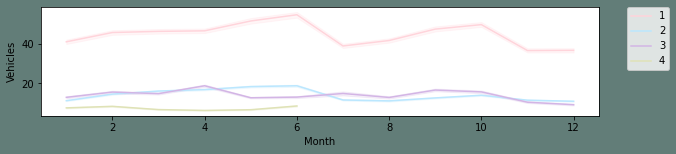

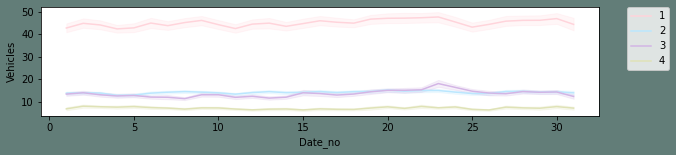

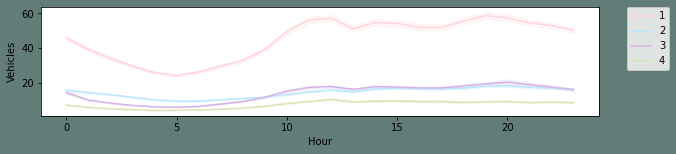

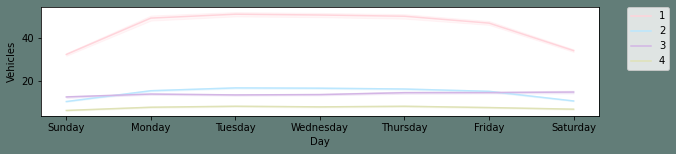

In [10]:
# Let's plot the Timeseries

new_feature = ["Year", "Month", "Date_no","Hour", "Day"]

for i in new_feature:
    plt.figure(figsize=(10,2), facecolor="#627D78")
    ax=sns.lineplot(x=df[i], y="Vehicles", data=df, hue="Junction",palette=colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

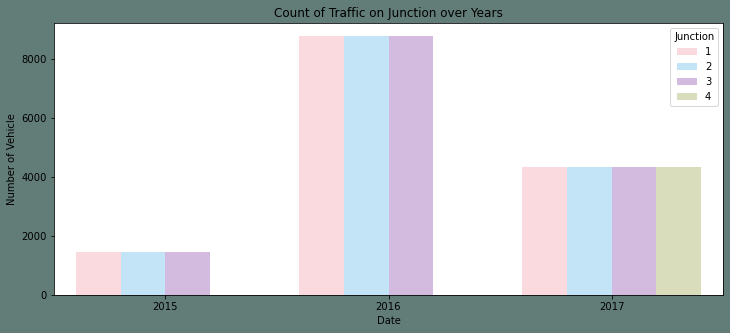

In [11]:
plt.figure(figsize=(12,5), facecolor="#627D78")
count = sns.countplot(data=df, x=df['Year'], hue="Junction",palette=colors)
count.set_title("Count of Traffic on Junction over Years")
count.set_ylabel("Number of Vehicle")
count.set_xlabel("Date")

<AxesSubplot:>

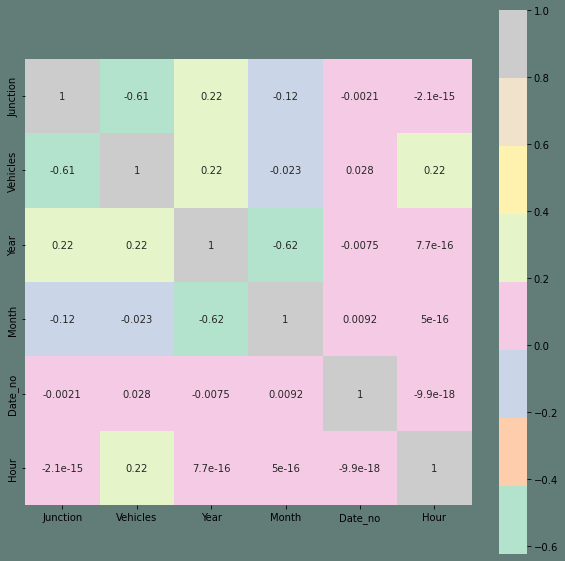

In [12]:
corrmat = df.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat, cmap="Pastel2", annot=True, square=True, )

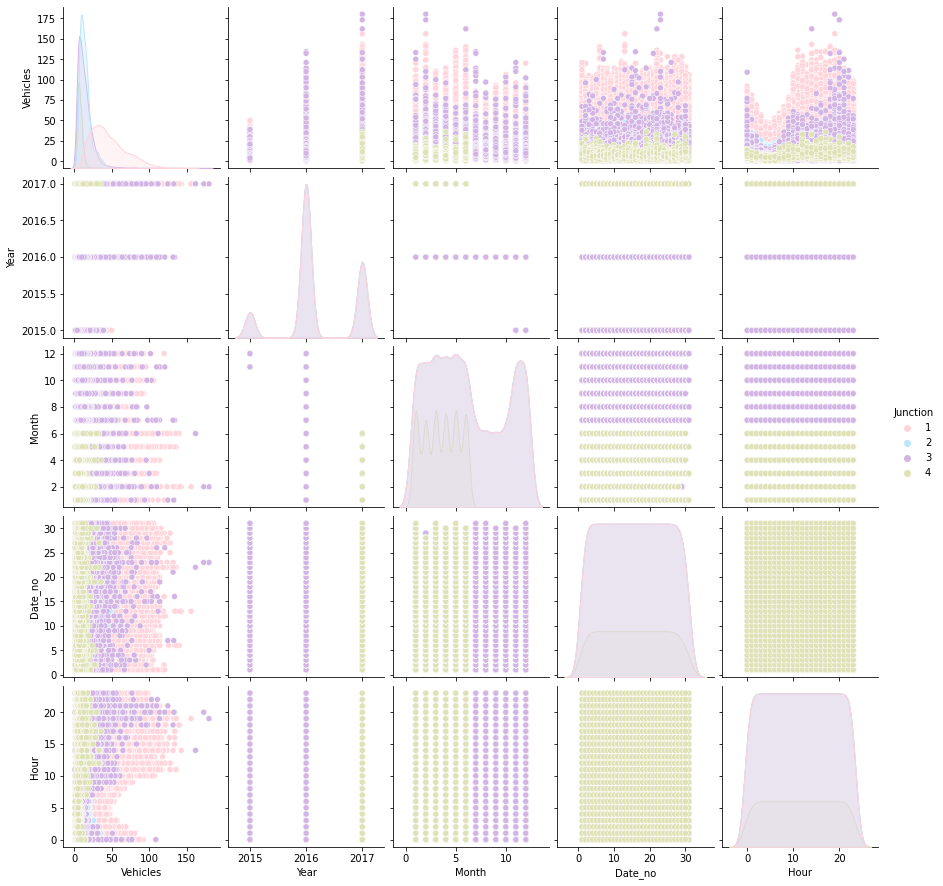

In [13]:
sns.pairplot(data=df, hue="Junction", palette=colors)

In [14]:
# Pivoting data from junction

df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

In [15]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
